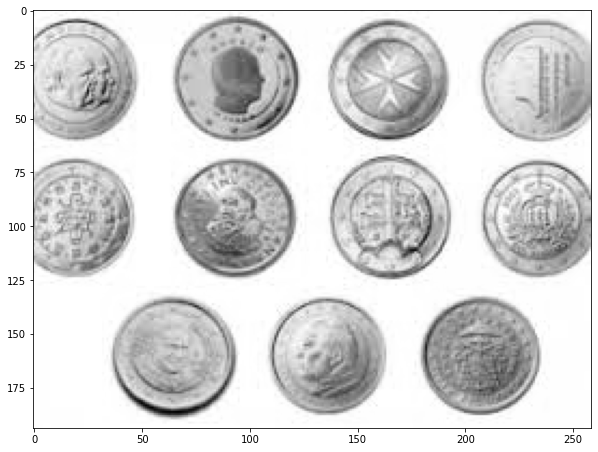

In [3]:
# importing important libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
image = 'coins.jpg'
images = cv2.imread(image, 1)
images_org = images.copy()
images = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (10,9)
plt.imshow(images, cmap='gray')

In [5]:
!pip install --user opencv-contrib-python

  Using cached opencv_contrib_python-4.5.3.56-cp39-cp39-win_amd64.whl (41.8 MB)


You should consider upgrading via the 'c:\users\nayanika singh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
images = cv2.GaussianBlur(images, (5,5),0) # creating gaussian image
float_circle_val = cv2.Houghcircle_val(images, cv2.HOUGH_GRADIENT, 0.9, minDist=120, param1=100, param2=50, minRadius=90, maxRadius=220)
circle_val = np.uint16(np.around(float_circle_val))
circle_val = np.squeeze(circle_val)
circle_val = circle_val[ circle_val[:,0].argsort()]

AttributeError: module 'cv2.cv2' has no attribute 'Houghcircle_val'

In [5]:
lines = np.empty([0,3] ,dtype=int)

i=0
while(i < circle_val.shape[0] - 1):
    j=i+1
    b=False
    nxt=1
    min_y = circle_val[i][1]
    max_y = circle_val[i][1]
    while(j < circle_val.shape[0]):
        if(circle_val[j][0] - circle_val[i][0] <= 40): #number '40' might vary for different images
            x1 = circle_val[i][0]
            if circle_val[j][1] < min_y:
                min_y = circle_val[j][1]
            
            x2 = circle_val[j][0]
            if circle_val[j][1] > max_y:
                max_y = circle_val[j][1]
                
            b=True
            nxt+=1
            
        j=j+1
    if b:
        x=int(np.mean([x1,x2]))
        lines = np.append(lines, [[x, min_y, max_y]], axis=0)
    i+=nxt
output = images_org.copy()
for i in range(lines.shape[0]):
    output = cv2.line(output, (lines[i][0],lines[i][1]), (lines[i][0],lines[i][2]), (0,255,0), 10)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(output)


NameError: name 'circle_val' is not defined